# Pierwszy program

**Wybrany temat:** 1

**Opis:**
Dla macierzy o rozmiarze mniejszym lub równym $2^{l}$ ×$2^{l}$ algorytm tradycyjny. Dla macierzy o rozmiarze większym od $2^{l}$ ×$2^{l}$ algorytm rekurencyjny Binéta.

**Przygotowali:**
- *Tomasz Bochnak*
- *Szymon Budziak*

## Importy

In [1]:
from time import perf_counter
from typing import List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

## Algorytm tradycyjny

In [2]:
class MatrixMultiplication:
    def __init__(self, l: int) -> None:
        self.l = l
        self.count = 0

    def main(self, k: int) -> tuple[np.ndarray, int, float]:
        """
        Main function to run the program

        Args:
            k (int): The power of 2 to create the matrix

        Returns:
            tuple[np.ndarray, int, float]: The result of the multiplication, the number of operations and the time of execution
        """
        A = np.random.randint(low=0, high=10, size=(2 ** k, 2 ** k))
        B = np.random.randint(low=0, high=10, size=(2 ** k, 2 ** k))
        self.count = 0

        start = perf_counter()
        if k <= self.l:
            result = self.traditional_algorithm(A, B)
            stop = perf_counter()
            return result, self.count, stop - start
        else:
            result = self.binet_algorithm(A, B)
            stop = perf_counter()
            return result, self.count, stop - start

    def traditional_algorithm(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        """
        Traditional algorithm to multiply two matrices

        Args:
            A (np.ndarray): The first matrix
            B (np.ndarray): The second matrix

        Returns:
            np.ndarray: The result of the multiplication
        """
        C = np.zeros(shape=(A.shape[0], B.shape[1]))

        for m in range(A.shape[0]):
            for r in range(B.shape[1]):
                for k in range(B.shape[0]):
                    C[m][r] += int(A[m][k] * B[k][r])
                    self.count += 1

        return C

    def split_matrix(self, M: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """
        Split the matrix into 4 smaller matrices

        Args:
            M (np.ndarray): The matrix to split

        Returns:
            tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: The 4 smaller matrices
        """
        n = M.shape[0] // 2
        return M[:n, :n], M[:n, n:], M[n:, :n], M[n:, n:]

    def binet_algorithm(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        """
        Binet algorithm to multiply two matrices

        Args:
            A (np.ndarray): The first matrix
            B (np.ndarray): The second matrix

        Returns:
            np.ndarray: The result of the multiplication
        """
        if A.shape == (1, 1):
            self.count += 1
            return A * B

        A11, A12, A21, A22 = self.split_matrix(A)
        B11, B12, B21, B22 = self.split_matrix(B)

        C1 = self.binet_algorithm(A11, B11) + self.binet_algorithm(A12, B21)
        C2 = self.binet_algorithm(A11, B12) + self.binet_algorithm(A12, B22)
        C3 = self.binet_algorithm(A21, B11) + self.binet_algorithm(A22, B21)
        C4 = self.binet_algorithm(A21, B12) + self.binet_algorithm(A22, B22)

        self.count += 4

        return np.block([[C1, C2], [C3, C4]])

### Przykład mnożenia macierzy z k = 3 oraz l = 1

In [3]:
MatrixMultiplication(l=1).main(k=3)

(array([[252, 260, 174, 218, 194, 205, 146, 178],
        [204, 213, 152, 192, 185, 218, 181, 225],
        [158, 166, 131, 164, 186, 177, 116, 185],
        [195, 230, 149, 163, 212, 205, 176, 164],
        [207, 201, 158, 166, 145, 153, 127, 148],
        [250, 263, 196, 178, 189, 230, 191, 194],
        [111, 161, 113, 179, 177, 171, 115, 168],
        [243, 208, 143, 166, 154, 207, 122, 197]]),
 804,
 0.0054406669999025326)

Rozmiar macierzy wejściowych to $2^{3} \times 2^{3} = 8 \times 8$. Przy k=3 oraz l=1 wykonał się algorytm rekurencyjny Bineta. Liczba operacji wyniosła 804, a czas wykonania 0.00587 s.

## Opracowanie

In [4]:
def multiplication_results(a: int, b: int, l: int) -> tuple[List[int], List[int], List[float]]:
    matrix_size = []
    matrix_time = []
    matrix_operations = []

    matrix_multiplication = MatrixMultiplication(l)

    for k in range(a, b + 1):
        _, operations, time = matrix_multiplication.main(k)

        matrix_size.append(2 ** k)
        matrix_time.append(time)
        matrix_operations.append(operations)

    return matrix_size, matrix_operations, matrix_time

In [5]:
def generate_plot(matrix_size: List[int], matrix_time: List[float], a: int, b: int, l: int, time: bool) -> pd.DataFrame:
    plt.figure(figsize=(15, 7))

    plt.plot(matrix_time, label="Execution time" if time else "Number of operations")

    x_tick = np.arange(len(matrix_size))
    x_labels = [f'{i} (2^{i}={2 ** i})' for i in range(a, b + 1)]
    plt.xticks(x_tick, x_labels)

    target_label = f'{l} (2^{l}={2 ** l})'
    target_index = x_labels.index(target_label)
    plt.axvline(x=target_index, color='red', linestyle='--', linewidth=2, label=f"l = {l}")

    if time:
        plot_title = f"Computation time for traditional matrix multiplication when k <= {l} and Binet matrix multiplication when k > {l}"
    else:
        plot_title = f"Number of operations for traditional matrix multiplication when k <= {l} and Binet matrix multiplication when k > {l}"

    plt.title(plot_title)
    plt.xlabel('Matrix size')
    plt.ylabel('Time [s]' if time else 'Number of operations')

    plt.legend()
    plt.grid()
    plt.show()

    return pd.DataFrame({
        "Matrix size": matrix_size,
        "Time [s]" if time else "Number of operations": matrix_time
    })

## Time comparison

Proszę narysować wykres: oś pozioma rozmiar macierzy $2^{k}$ ×$2^{k}$ dla k = 2, 3, 4, ..., 16 (ile się uda), oś pionowa czas mnożenia swoją metodą rekurencyjną. Proszę narysować różne wykresy dla wybranych l z przedziału 2 < l < k.

### l = 3

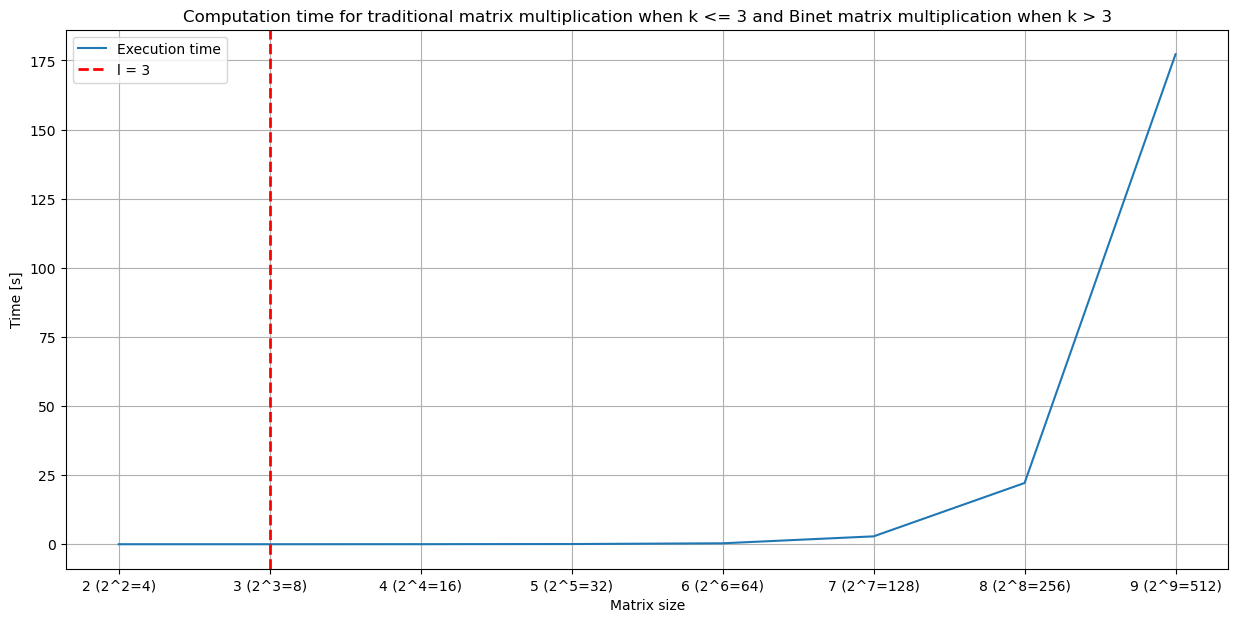

   Matrix size    Time [s]
0            4    0.000231
1            8    0.001409
2           16    0.018940
3           32    0.066918
4           64    0.337166
5          128    2.846014
6          256   22.148711
7          512  177.235890


In [6]:
a = 2
b = 9
l = 3
size, _, time = multiplication_results(a, b, l)
df = generate_plot(size, time, a, b, l, time=True)
print(df)

### l = 5

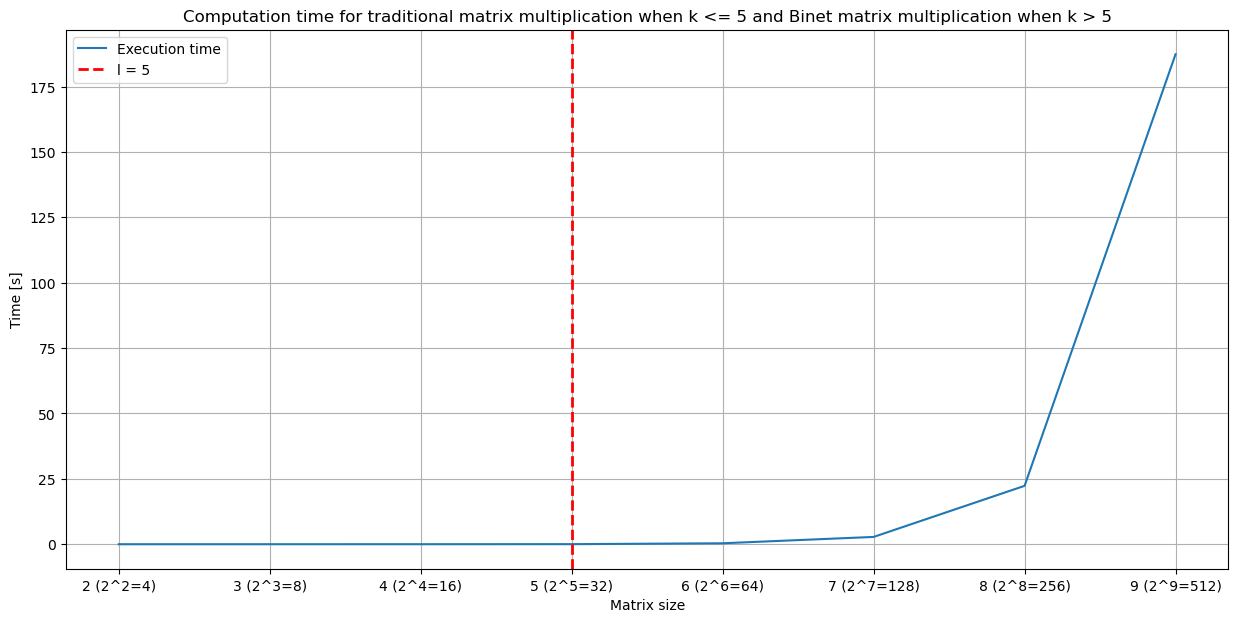

   Matrix size    Time [s]
0            4    0.000069
1            8    0.001173
2           16    0.005599
3           32    0.026480
4           64    0.363052
5          128    2.788426
6          256   22.325105
7          512  187.344036


In [7]:
a = 2
b = 9
l = 5
size, _, time = multiplication_results(a, b, l)
df = generate_plot(size, time, a, b, l, time=True)
print(df)

### l = 7

## Operations comparison

Proszę narysować wykres: oś pozioma rozmiar macierzy $2^{k}$ ×$2^{k}$ dla k = 2, 3, 4, ..., 16 (ile się uda), oś pionowa liczba operacji zmiennoprzecinkowych swoją metodą rekurencyjną. Proszę narysować różne wykresy dla wybranych l z przedziału 2 < l < k.

### l = 3

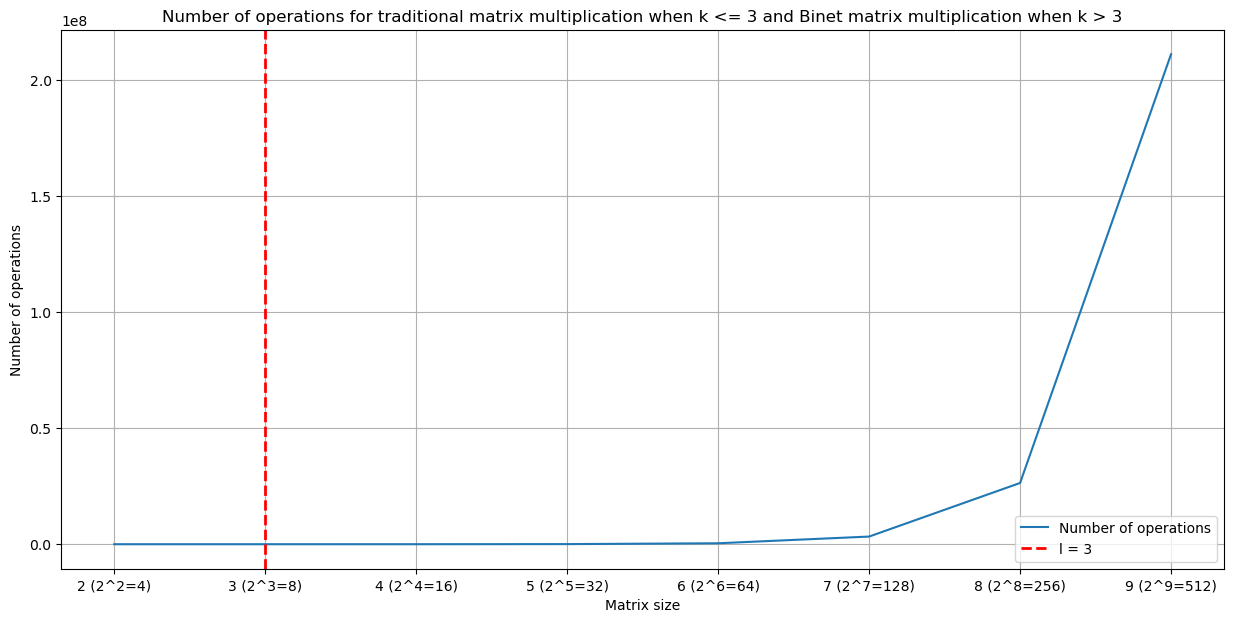

   Matrix size  Number of operations
0            4                    64
1            8                   512
2           16                  6436
3           32                 51492
4           64                411940
5          128               3295524
6          256              26364196
7          512             210913572


In [8]:
a = 2
b = 9
l = 3
size, operations, _ = multiplication_results(a, b, l)
df = generate_plot(size, operations, a, b, l, time=False)
print(df)

### l = 5

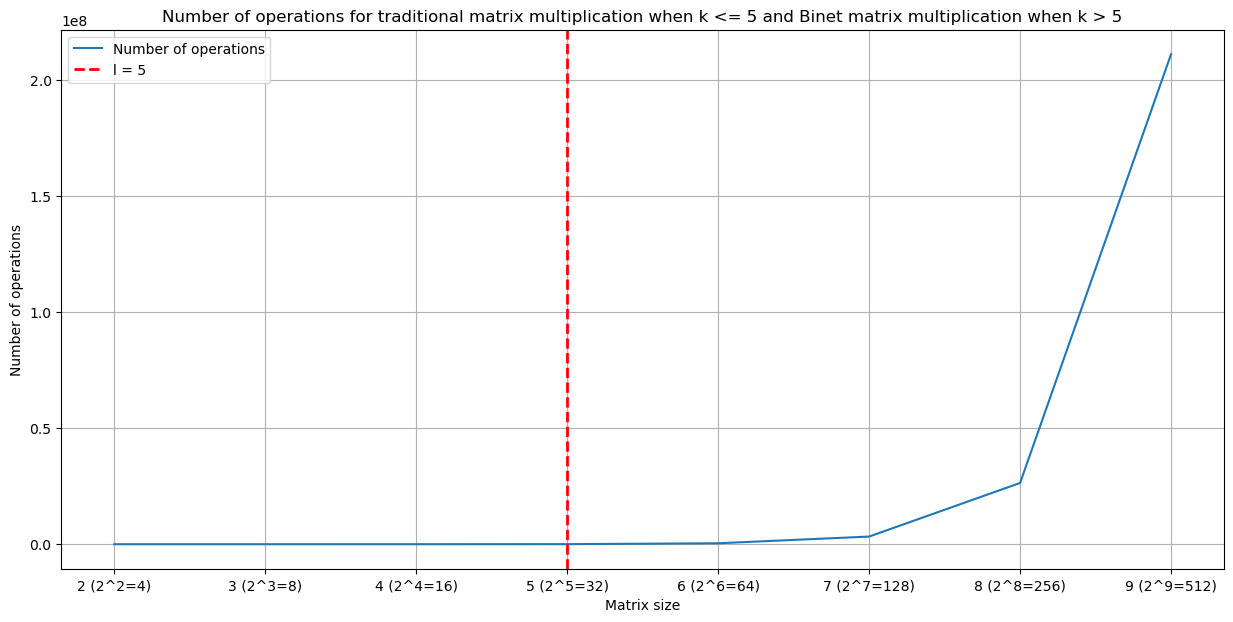

   Matrix size  Number of operations
0            4                    64
1            8                   512
2           16                  4096
3           32                 32768
4           64                411940
5          128               3295524
6          256              26364196
7          512             210913572


In [9]:
a = 2
b = 9
l = 5
size, operations, _ = multiplication_results(a, b, l)
df = generate_plot(size, operations, a, b, l, time=False)
print(df)

### l = 7

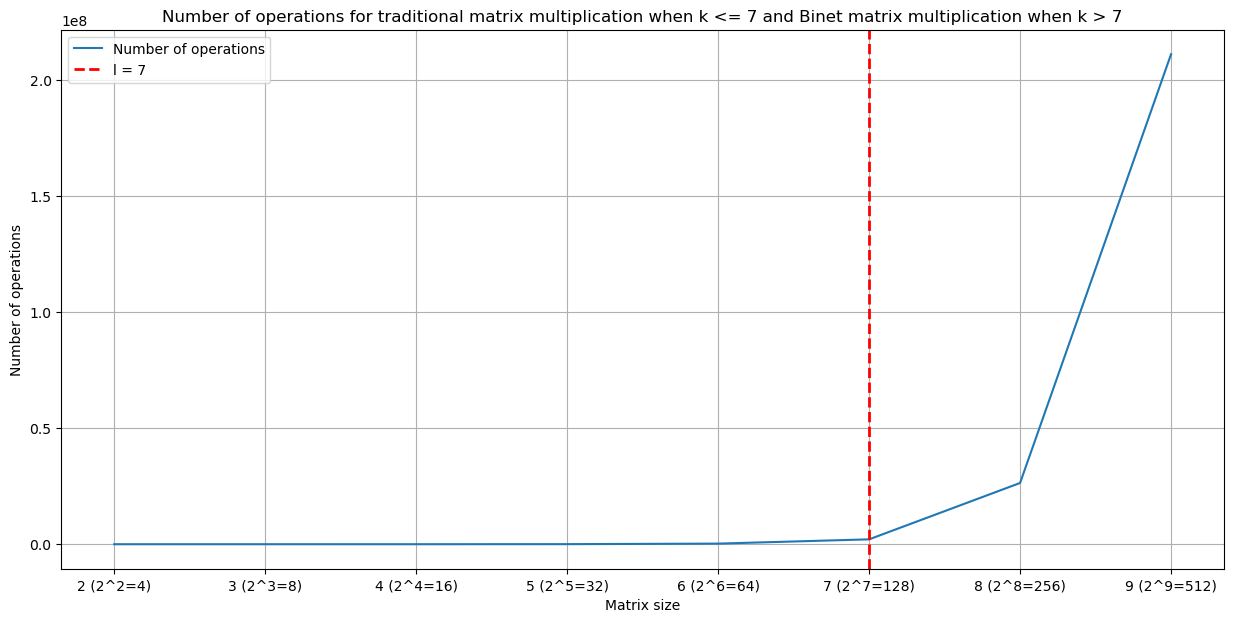

   Matrix size  Number of operations
0            4                    64
1            8                   512
2           16                  4096
3           32                 32768
4           64                262144
5          128               2097152
6          256              26364196
7          512             210913572


In [10]:
a = 2
b = 9
l = 7
size, operations, _ = multiplication_results(a, b, l)
df = generate_plot(size, operations, a, b, l, time=False)
print(df)

### Pseudokod algorytmu liczącego mnożenie macierzy metodą tradycyjną

*Źródło: Wykład profesora Paszyńskiego z przedmiotu Algorytmy Macierzowe*

![](img/traditional_pseudokod.png)

## Pseudokod algorytmu liczącego mnożenie macierzy metodą Bineta
*Źródło: Wykład profesora Paszyńskiego z przedmiotu Algorytmy Macierzowe*

![](img/binet_pseudokod.png)

## Estimation of computational complexity

In [11]:
from scipy.optimize import curve_fit

In [12]:
def func(x, a, n):
    return a * x ** n


def curve_plot(k: int) -> pd.DataFrame:
    a = 0
    l = np.arange(a, k + 1)
    _, operations_traditional, _ = multiplication_results(a, k, k + 1)
    _, operations_binet, _ = multiplication_results(a, k, 1)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(l, operations_traditional, 'o', label="Traditional Algorithm: number of operations")
    ax.plot(l, operations_binet, 'o', label="Binet Algorithm: number of operations")

    l2 = np.linspace(a, k)
    popt_traditional, _ = curve_fit(func, 2 ** l, operations_traditional)
    a_traditional, n_traditional = popt_traditional
    popt_binet, _ = curve_fit(func, 2 ** l, operations_binet)
    a_binet, n_binet = popt_binet

    ax.plot(l2, func(2 ** l2, a_traditional, n_traditional),
            label=f"Traditional Algorithm curve: {round(a_traditional, 3)} * x^{round(n_traditional, 3)}")
    ax.plot(l2, func(2 ** l2, a_binet, n_binet),
            label=f"Binet Algorithm curve: {round(a_binet, 3)} * x^{round(n_binet, 3)}")

    ax.legend()
    plt.title('Estimation of computational complexity')
    plt.show()

    return pd.DataFrame(
        data={
            "l": l,
            "Traditional Algorithm": operations_traditional,
            "Binet Algorithm": operations_binet
        }
    )

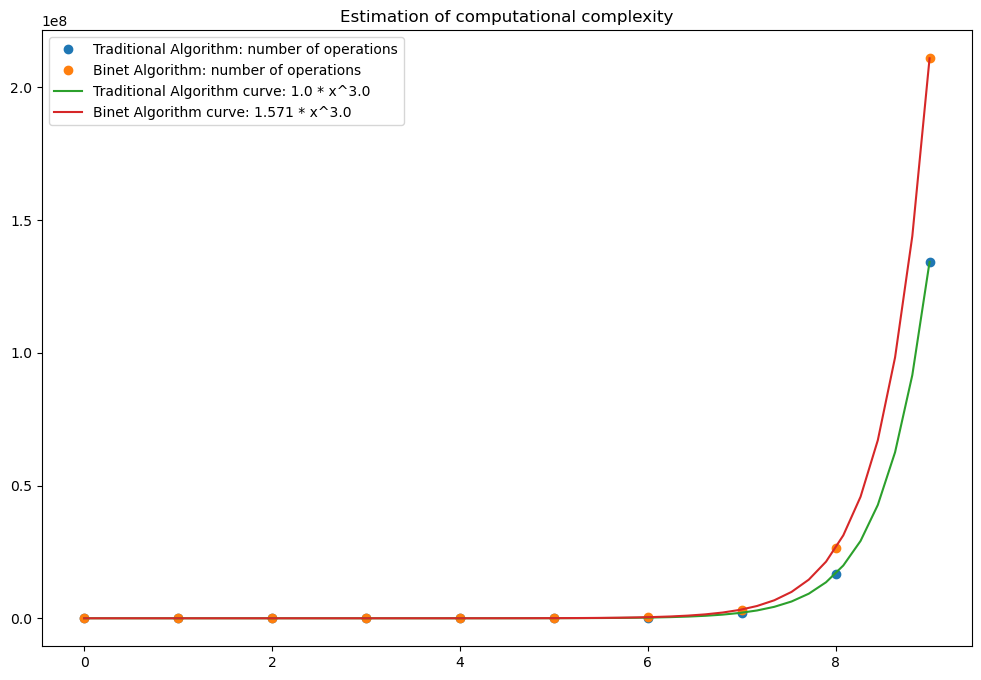

   l  Traditional Algorithm  Binet Algorithm
0  0                      1                1
1  1                      8                8
2  2                     64              100
3  3                    512              804
4  4                   4096             6436
5  5                  32768            51492
6  6                 262144           411940
7  7                2097152          3295524
8  8               16777216         26364196
9  9              134217728        210913572


In [13]:
df = curve_plot(9)
print(df)

Jak można zauważyć, dopasowane krzywe to:
1. Dla algorytmu tradycyjnego $1.0x^{3}$ co odpowiada złożoności $O(n^{3})$
2. Dla algorytmu Bineta $1.571x^{3}$ co odpowiada złożoności $O(n^{3})$


 Podsumowując, oszacowane na podstawie wyników złożoność implementacji algorytwów zgadza się ze złożonością teoretyczną co swiadczy o poprawnej implementacji algorytmów.